In [4]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv('data.csv',',',error_bad_lines=False)

C:\Users\kseth\AppData\Local\Temp\ipykernel_25832\799342841.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  data = pd.read_csv('data.csv',',',error_bad_lines=False)
C:\Users\kseth\AppData\Local\Temp\ipykernel_25832\799342841.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('data.csv',',',error_bad_lines=False)
b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkip

In [6]:
data.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [7]:
data[data['password'].isnull()]

,password,strength
367579,NaN,0


In [8]:
passwords_tuple=np.array(data)

In [9]:
passwords_tuple

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

In [10]:
import random
random.shuffle(passwords_tuple) #shuffling randomly for robustness

In [11]:
y=[labels[1] for labels in passwords_tuple]

In [12]:
X=[labels[0] for labels in passwords_tuple]

In [13]:
import seaborn as sns

<AxesSubplot:xlabel='strength', ylabel='count'>

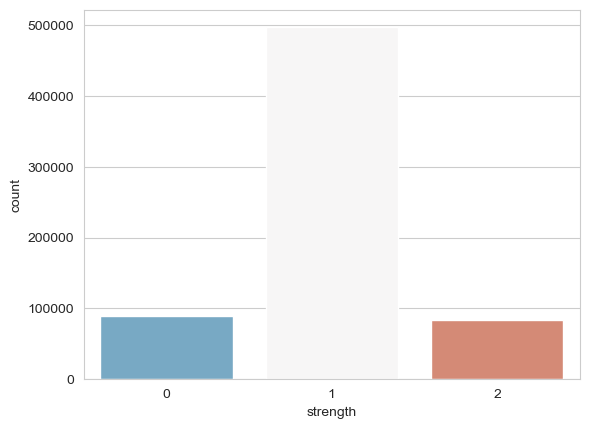

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='strength',data=data,palette='RdBu_r')




In [15]:
data.shape

(669640, 2)

In [17]:
def word_divide_char(inputs):
    characters=[]
    for i in inputs:
        characters.append(i)
    return characters

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(tokenizer=word_divide_char)
X=vectorizer.fit_transform(X)

In [19]:
X.shape

(669640, 132)

In [20]:
vectorizer.vocabulary_

{'k': 59,
 'z': 74,
 'd': 52,
 'e': 53,
 '5': 32,
 '7': 34,
 'v': 70,
 'i': 57,
 's': 67,
 '1': 28,
 'y': 73,
 'r': 66,
 'm': 61,
 'g': 55,
 '2': 29,
 '3': 30,
 'l': 60,
 'a': 49,
 'b': 50,
 'o': 63,
 'h': 56,
 'n': 62,
 '8': 35,
 '4': 31,
 'u': 69,
 '6': 33,
 'c': 51,
 'w': 71,
 'q': 65,
 'f': 54,
 't': 68,
 '9': 36,
 '0': 27,
 'j': 58,
 '-': 24,
 '@': 42,
 'p': 64,
 '>': 40,
 '.': 25,
 'x': 72,
 '!': 14,
 '&': 19,
 '?': 41,
 '<': 38,
 '_': 47,
 ';': 37,
 '±': 87,
 '$': 17,
 '"': 15,
 '~': 78,
 '+': 23,
 '^': 46,
 '/': 26,
 ')': 21,
 '(': 20,
 ' ': 13,
 '#': 16,
 '*': 22,
 '\\': 44,
 'þ': 123,
 'ó': 114,
 '=': 39,
 '[': 43,
 '{': 75,
 'ú': 120,
 '`': 48,
 '%': 18,
 '\x1c': 11,
 '}': 77,
 ']': 45,
 'ô': 115,
 '\x05': 2,
 '\x1b': 10,
 '³': 89,
 'à': 99,
 'ä': 102,
 'õ': 116,
 '«': 84,
 '°': 86,
 'ß': 98,
 '¾': 95,
 '²': 88,
 'ð': 111,
 '¿': 96,
 '\x10': 6,
 '\x17': 9,
 '\x16': 8,
 'ò': 113,
 '·': 92,
 '\x1e': 12,
 '|': 76,
 'å': 103,
 '‚': 127,
 'â': 101,
 '´': 90,
 '÷': 118,
 'û': 121,

In [21]:
data.iloc[0,0]

'kzde5577'

In [22]:
feature_names = vectorizer.get_feature_names()
 
#get tfidf vector for first document
first_document_vector=X[0]
 
#print the scores
df = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)

c:\Users\kseth\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,tfidf
7,0.591485
5,0.567174
z,0.336021
k,0.291998
d,0.285326
...,...
=,0.000000
<,0.000000
;,0.000000
9,0.000000


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)  #splittin
log_class=LogisticRegression(penalty='l2',multi_class='ovr')
log_class.fit(X_train,y_train)

c:\Users\kseth\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\kseth\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LogisticRegression(multi_class='ovr')

In [24]:
print(log_class.score(X_test,y_test))

0.8147661430022102


In [25]:
## Multinomial

clf = LogisticRegression(random_state=0, multi_class='multinomial', solver='newton-cg')
clf.fit(X_train, y_train) #training
print(clf.score(X_test, y_test))

0.8223149752105609


In [27]:
X_predict=np.array(["%@123******abcd"])
X_predict=vectorizer.transform(X_predict)
y_pred=log_class.predict(X_predict)
print(y_pred)

[1]


In [28]:
import xgboost as xgb

In [30]:
xgb_classifier= xgb.XGBClassifier()
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [31]:
xgb_classifier.score(X_test,y_test) 

0.9860223403619855

In [32]:
X_predict=np.array(["%@123******abcd"])
X_predict=vectorizer.transform(X_predict)
y_pred=xgb_classifier.predict(X_predict)
print(y_pred)

[2]


In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, log_class.predict(X_test))
cm


array([[ 3318, 14331,    35],
       [ 2161, 95315,  2192],
       [   72,  6017, 10487]], dtype=int64)

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,log_class.predict(X_test)))


              precision    recall  f1-score   support

           0       0.60      0.19      0.29     17684
           1       0.82      0.96      0.89     99668
           2       0.82      0.63      0.72     16576

    accuracy                           0.81    133928
   macro avg       0.75      0.59      0.63    133928
weighted avg       0.79      0.81      0.79    133928



**NAIVE BAYES**

In [38]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier=MultinomialNB()

In [39]:
nb_classifier.fit(X_train,y_train)
nb_classifier.score(X_test,y_test)

0.7451018457678753

In [42]:
X_predict=np.array(["cd"]) 
X_predict=vectorizer.transform(X_predict)
y_pred=nb_classifier.predict(X_predict)
print(y_pred)

[1]


**RANDOM FOREST**

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=10)
rf_classifier.fit(X_train,y_train)
rf_classifier.score(X_test,y_test)

0.9803028492921569

In [43]:
X_predict=np.array(["%@123******abcd"])
X_predict=vectorizer.transform(X_predict)
y_pred=rf_classifier.predict(X_predict)
print(y_pred)

[1]
